# Observation du dataset

In [1]:
import texthero as hero
import pandas as pd
from prepocessing import preprocessing

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Apprenant\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Apprenant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Apprenant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Apprenant\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Lecture et preprocessing

In [2]:
data = pd.read_csv("data/Emotion_final.csv")
NUM_TOP_WORDS = 5
data = preprocessing(data)
temp = data[:10000].copy()
temp.groupby('Emotion')['clean_text'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

Emotion          
anger     feel       1234
          like        237
          im          203
          feeling     194
          get         131
fear      feel       1061
          im          189
          feeling     179
          like        168
          go          105
happy     feel       3229
          like        647
          im          499
          feeling     339
          make        308
love      feel        796
          like        227
          love        158
          im          112
          feeling     102
sadness   feel       2706
          like        564
          im          434
          feeling     393
          get         216
surprise  feel        347
          im           54
          feeling      51
          like         51
          weird        41
Name: clean_text, dtype: int64

## Visualisation des mots les plus courants

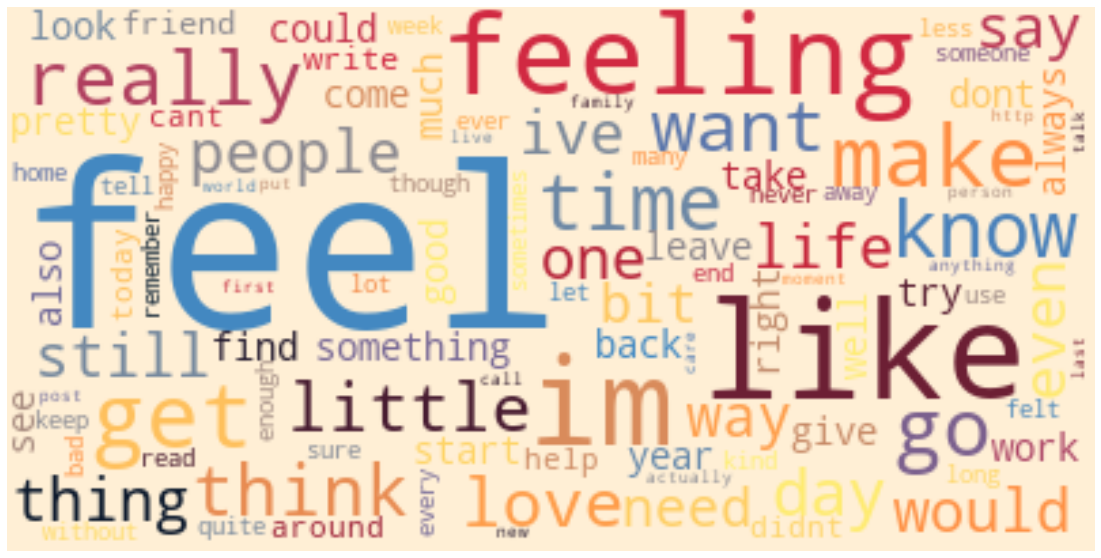

In [3]:
hero.wordcloud(temp.clean_text, max_words=100,)

In [4]:
temp['tfidf_clean_text'] = hero.tfidf(temp['clean_text'])
temp['pca_tfidf_clean_text'] = hero.pca(temp['tfidf_clean_text'])
temp['target_label'] = temp.Emotion

## PCA

In [5]:
hero.scatterplot(temp, col='pca_tfidf_clean_text', color='target_label', title="PCA Emotion")